In [123]:
import pandas as pd
data = pd.read_csv("master_dataset/processed_data.csv")
#list(data.columns)
#drop unwanted features
data = data.drop(['title', 'text', 'subject', 'date', 'text_without_stopwords', 'title_without_stopwords','syllables', 'polarity_category', 'overall_content', 'polarity',
#'Topic 1 Probability', 'Topic 2 Probability', 'Topic 3 Probbility' , 'Topic 4 Probability' ,'Topic 5 Probability',
'title_word_count', 'title_sentence_count', 'title_average_word_length','title_punctuation_count', 'title_stopwords_count'], axis=1)  

In [124]:
#dataset is slightly imbalanced so we will perform upsampling to balance the dataset.
data['class'].value_counts()

0    21196
1    17462
Name: class, dtype: int64

In [125]:
list(data.columns)

['class',
 'text_word_count',
 'text_sentence_count',
 'text_average_word_length',
 'text_punctuation_count',
 'text_stopwords_count',
 'flesch_readability',
 'subjectivity',
 'Topic 1 Probability',
 'Topic 2 Probability',
 'Topic 3 Probbility',
 'Topic 4 Probability',
 'Topic 5 Probability',
 'polarity_category_Neutral',
 'polarity_category_Positive']

In [126]:
data

,class,text_word_count,text_sentence_count,text_average_word_length,text_punctuation_count,text_stopwords_count,flesch_readability,subjectivity,Topic 1 Probability,Topic 2 Probability,Topic 3 Probbility,Topic 4 Probability,Topic 5 Probability,polarity_category_Neutral,polarity_category_Positive
0,1,516,28,4.804040,121,186,0.523532,0.599895,0.002194,0.747636,0.001007,0.157660,0.091503,0,1
1,1,309,11,5.213115,39,119,-0.005318,0.334098,0.064904,0.244962,0.557051,0.002320,0.130763,1,0
2,1,600,25,5.168966,148,209,0.262617,0.541969,0.002488,0.433611,0.281460,0.001917,0.280524,1,0
3,1,475,15,5.180180,118,160,0.180632,0.394086,0.002963,0.788261,0.204377,0.002290,0.002109,1,0
4,1,434,19,4.554762,40,195,0.621461,0.495222,0.292172,0.327938,0.001138,0.020911,0.357842,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38653,0,482,15,5.008639,68,179,0.164343,0.447884,0.914667,0.001589,0.001079,0.081064,0.001601,0,1
38654,0,131,6,5.336066,15,45,0.094151,0.077778,0.131316,0.004004,0.530149,0.330457,0.004075,1,0
38655,0,334,16,5.044164,45,127,0.317218,0.426609,0.105075,0.002268,0.001528,0.172448,0.718681,0,1
38656,0,210,8,4.806931,18,81,0.380865,0.377753,0.957421,0.003175,0.002141,0.003484,0.033779,1,0


In [127]:
#Split the dataset train,validation and test sets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
x = data.iloc[:,1:]
y = data.iloc[:,:1]

#first split dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4222)

x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.25, random_state = 4222)

#balance x_train with oversampling
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy = 1)
x_train,y_train = oversample.fit_resample(x_train, y_train)
data = pd.concat([x_train,y_train],axis = 1)

#check that train set is oversampled
data['class'].value_counts()

#Ensemble methods such as XGBoost and AdaBoost do not require feature scaling.

0    12717
1    12717
Name: class, dtype: int64

AdaBoost

In [128]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import numpy as np

#Ada Boost baseline model
# we will use unscaled x_train and x_test sets here.

ada_boost = AdaBoostClassifier( random_state = 4222)
ada_boost.fit(x_train, np.ravel(y_train))
y_pred_ada_boost = ada_boost.predict(x_validation)

#validation metrics
print("Performance on Validation set:")
print("Accuracy:", metrics.accuracy_score(y_validation, y_pred_ada_boost))
print("Precision:", metrics.precision_score(y_validation, y_pred_ada_boost))
print("Recall:",metrics.recall_score(y_validation, y_pred_ada_boost))
print("F1_score:", metrics.f1_score(y_validation, y_pred_ada_boost))
print("-------------------------------")
#test metrics
y_pred_ada_boost = ada_boost.predict(x_test)
print("Performance on  Test set:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_ada_boost))
print("Precision:", metrics.precision_score(y_test, y_pred_ada_boost))
print("Recall:",metrics.recall_score(y_test, y_pred_ada_boost))
print("F1_score:", metrics.f1_score(y_test, y_pred_ada_boost))

Performance on Validation set:
Accuracy: 0.8635540610450078
Precision: 0.8357714601159261
Recall: 0.8681192660550459
F1_score: 0.8516383068485446
-------------------------------
Performance on  Test set:
Accuracy: 0.8751939989653389
Precision: 0.8497237569060774
Recall: 0.8796110952244781
F1_score: 0.8644091611634115


<Axes: >

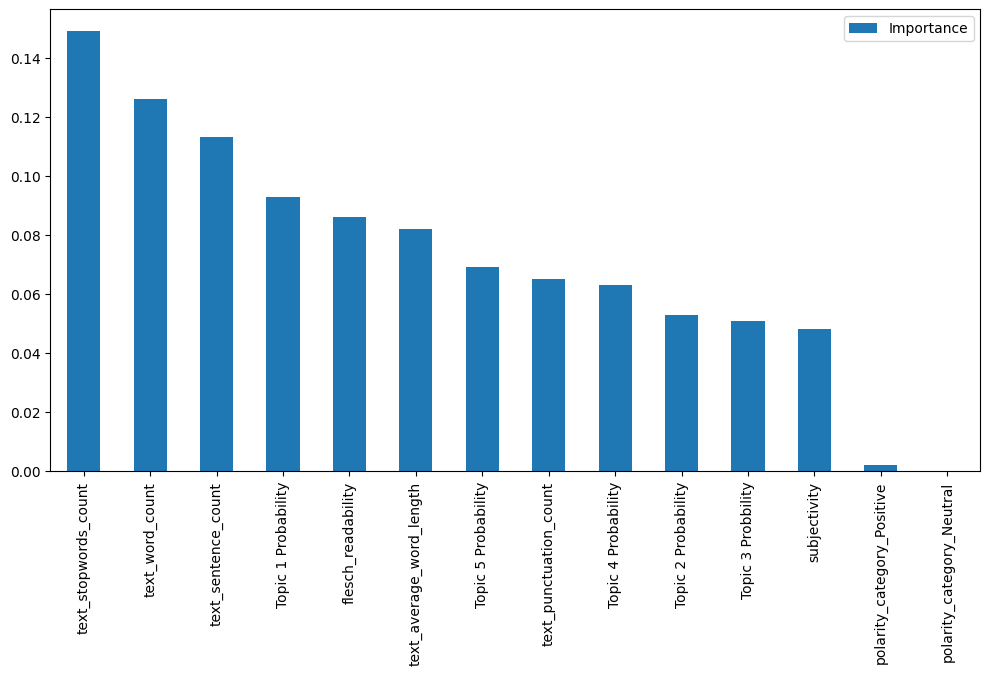

In [135]:
import matplotlib.pyplot as plt

# Get feature importances from the model
importances = ada_boost.feature_importances_

feat_importances = pd.DataFrame(ada_boost.feature_importances_, index=x_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(12,6))


In [130]:
#hyperparameter tuning with gridsearch for Ada Boost
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_estimators': [50, 100, 200,500,1000],
    'learning_rate': [0.01, 0.1, 0.5, 1, 10],
    'algorithm': ['SAMME', 'SAMME.R'],
}
scorer = metrics.make_scorer(metrics.f1_score)

gridCV = GridSearchCV(AdaBoostClassifier(random_state = 4222), param_grid = grid_params, cv = 5, scoring = scorer, n_jobs=-1)
gridCV.fit(x_train,np.ravel(y_train))
print("Best Hyper Parameters: ", gridCV.best_params_)

Best Hyper Parameters:  {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 1000}


In [131]:
ada_boost = AdaBoostClassifier( algorithm= 'SAMME.R', learning_rate= 1, n_estimators= 1000, random_state = 1)
ada_boost.fit(x_train, np.ravel(y_train))
y_pred_ada_boost = ada_boost.predict(x_validation)

#validation metrics
print("Performance on Validation set:")
print("Accuracy:", metrics.accuracy_score(y_validation, y_pred_ada_boost))
print("Precision:", metrics.precision_score(y_validation, y_pred_ada_boost))
print("Recall:",metrics.recall_score(y_validation, y_pred_ada_boost))
print("F1_score:", metrics.f1_score(y_validation, y_pred_ada_boost))
print("-------------------------------")
#test metrics
y_pred_ada_boost = ada_boost.predict(x_test)
print("Performance on  Test set:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_ada_boost))
print("Precision:", metrics.precision_score(y_test, y_pred_ada_boost))
print("Recall:",metrics.recall_score(y_test, y_pred_ada_boost))
print("F1_score:", metrics.f1_score(y_test, y_pred_ada_boost))

Performance on Validation set:
Accuracy: 0.9004138644593895
Precision: 0.8815272318921954
Recall: 0.9002293577981652
F1_score: 0.8907801418439716
-------------------------------
Performance on  Test set:
Accuracy: 0.9049405069839628
Precision: 0.8883577052868391
Recall: 0.9033457249070632
F1_score: 0.8957890259464059


XGBoost

In [146]:
import xgboost as xgb
import numpy as np
xg_reg = xgb.XGBRegressor(objective = 'binary:logistic') 
xg_reg.fit(x_train,np.ravel(y_train))

#validation metrics
y_pred_xg = xg_reg.predict(x_validation)
y_pred_xg = np.where(y_pred_xg > 0.5, 1, 0)

print("Performance on Validation set:")
print("Accuracy:", metrics.accuracy_score(y_validation, y_pred_xg))
print("Precision:", metrics.precision_score(y_validation, y_pred_xg))
print("Recall:",metrics.recall_score(y_validation, y_pred_xg))
print("F1_score:", metrics.f1_score(y_validation, y_pred_xg))
print("-------------------------------")

#test metrics
y_pred_xg = xg_reg.predict(x_test)
y_pred_xg = np.where(y_pred_xg > 0.5, 1, 0)

print("Performance on  Test set:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_xg))
print("Precision:", metrics.precision_score(y_test, y_pred_xg))
print("Recall:",metrics.recall_score(y_test, y_pred_xg))
print("F1_score:", metrics.f1_score(y_test, y_pred_xg))

Performance on Validation set:
Accuracy: 0.9204604242110709
Precision: 0.907286645874681
Recall: 0.9174311926605505
F1_score: 0.9123307198859587
-------------------------------
Performance on  Test set:
Accuracy: 0.9239524055871702
Precision: 0.9156901971991998
Recall: 0.916213897626537
F1_score: 0.9159519725557461


In [158]:
#hyperparameter tuning with gridsearch for XGBoost
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_estimators': [50, 200, 300, 400],
    'learning_rate': [0.01, 0.3, 0.5, 1],
    'colsample_bytree': [0.6, 0.7, 0.8],
    'subsample': [0.6, 0.7, 0.8],
    'gamma': [0.3, 0.4, 0.5],
    'max_depth': [ 3, 6, 8],
}
scorer = metrics.make_scorer(metrics.accuracy_score)

gridCV = GridSearchCV(estimator = xg_reg, param_grid = grid_params, cv = 3, scoring = 'f1_micro', n_jobs=-1, verbose = 1)
gridCV.fit(x_train,np.ravel(y_train))
print("Best Hyper Parameters: ", gridCV.best_params_)

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits


c:\Users\yj_li\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(


Best Hyper Parameters:  {'colsample_bytree': 0.6, 'gamma': 0.3, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.6}


In [157]:
grid_params = {
    'n_estimators': [50],
    'learning_rate': [0.01],
    'colsample_bytree': [0.6],
    'subsample': [0.6],
    'gamma': [0.3],
    'max_depth': [3],
}
xg_reg = xgb.XGBRegressor(objective = 'binary:logistic', n_estimators = 50, learning_rate = 1, colsample_bytree = 0.6, subsample = 0.6, gamma = 0.3, max_depth = 3) 
xg_reg.fit(x_train,np.ravel(y_train))

#validation metrics
y_pred_xg = xg_reg.predict(x_validation)
y_pred_xg = np.where(y_pred_xg > 0.5, 1, 0)

print("Performance on Validation set:")
print("Accuracy:", metrics.accuracy_score(y_validation, y_pred_xg))
print("Precision:", metrics.precision_score(y_validation, y_pred_xg))
print("Recall:",metrics.recall_score(y_validation, y_pred_xg))
print("F1_score:", metrics.f1_score(y_validation, y_pred_xg))
print("-------------------------------")

#test metrics
y_pred_xg = xg_reg.predict(x_test)
y_pred_xg = np.where(y_pred_xg > 0.5, 1, 0)

print("Performance on  Test set:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_xg))
print("Precision:", metrics.precision_score(y_test, y_pred_xg))
print("Recall:",metrics.recall_score(y_test, y_pred_xg))
print("F1_score:", metrics.f1_score(y_test, y_pred_xg))

Performance on Validation set:
Accuracy: 0.902353854112778
Precision: 0.8856900931414056
Recall: 0.8996559633027523
F1_score: 0.8926184042099274
-------------------------------
Performance on  Test set:
Accuracy: 0.9051991722710813
Precision: 0.8899548532731377
Recall: 0.9019159279382327
F1_score: 0.895895469393552
